In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

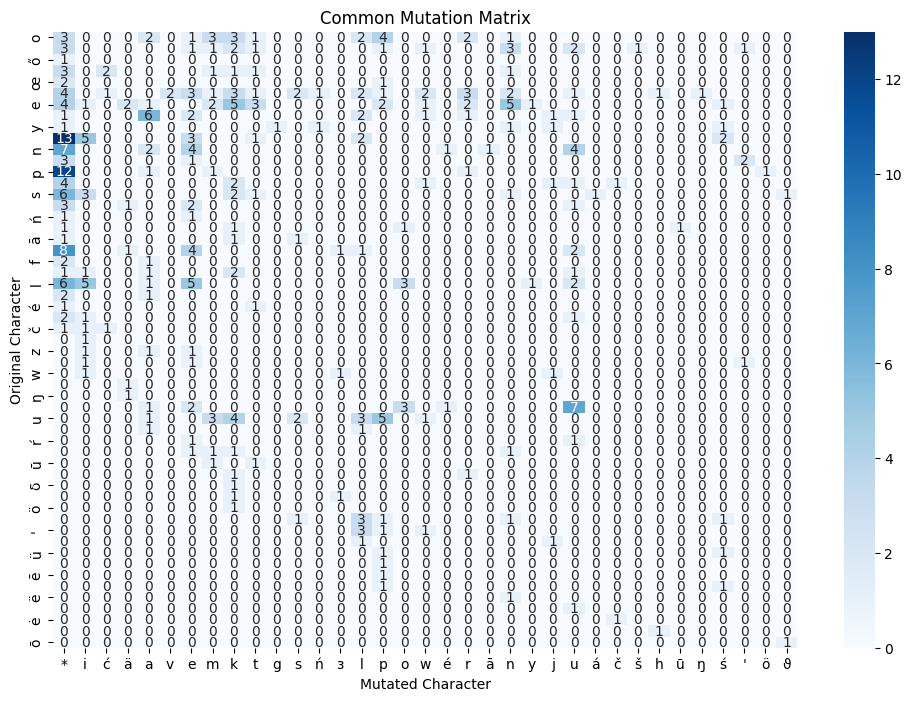

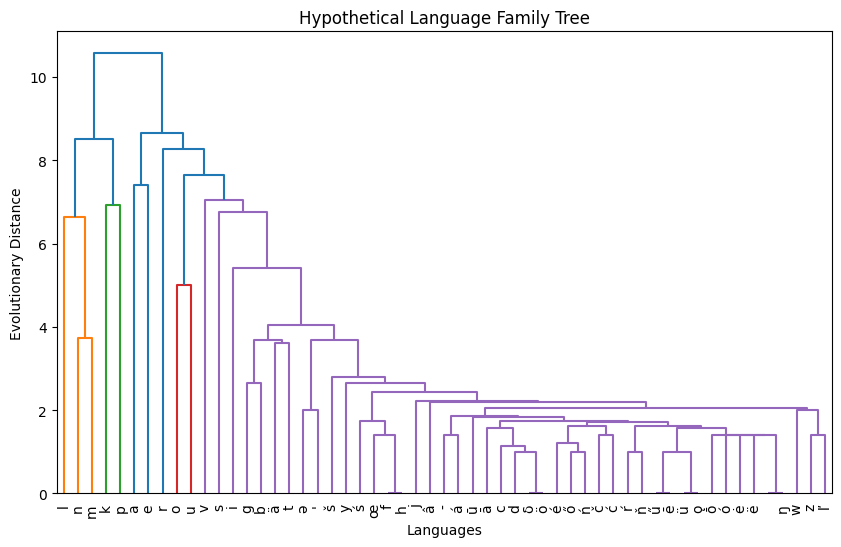

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the datasets
def load_data(proto_path, current_path):
    proto_df = pd.read_csv(proto_path)
    current_df = pd.read_csv(current_path)
    return proto_df, current_df

# Compute mutation matrix
def compute_mutation_matrix(proto_df, current_df):
    mutation_counts = defaultdict(lambda: defaultdict(int))
    
    for col in proto_df.columns[1:]:  # Skip language names
        for proto_word, current_word in zip(proto_df[col].fillna(''), current_df[col].fillna('')):
            for p_char, c_char in zip(proto_word, current_word):
                if p_char != c_char:
                    mutation_counts[p_char][c_char] += 1
    
    return pd.DataFrame(mutation_counts).fillna(0)

# Plot mutation matrix
def plot_mutation_matrix(matrix):
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt=".0f", cmap="Blues")
    plt.title("Common Mutation Matrix")
    plt.xlabel("Mutated Character")
    plt.ylabel("Original Character")
    plt.show()

# Build and plot language family tree
def plot_language_tree(matrix):
    # Convert mutation matrix into a square format
    mutation_distances = pdist(matrix.values, metric='euclidean')
    linked = linkage(mutation_distances, method='average')
    
    plt.figure(figsize=(10, 6))
    dendrogram(linked, labels=matrix.index.tolist(), leaf_rotation=90, leaf_font_size=10)
    plt.title("Hypothetical Language Family Tree")
    plt.xlabel("Languages")
    plt.ylabel("Evolutionary Distance")
    plt.show()

# Main execution
proto_words_path = "hw1/proto_words.csv"
current_words_path = "hw1/current_words.csv"
proto_words_df, current_words_df = load_data(proto_words_path, current_words_path)
mutation_matrix = compute_mutation_matrix(proto_words_df, current_words_df)
plot_mutation_matrix(mutation_matrix)
plot_language_tree(mutation_matrix)
